In [1]:
import pandas as pd
import json
import requests
import prettytable
from config import api_key
import matplotlib.pyplot as plt
import numpy as np
import bls

In [5]:
series_dict = {
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB1101M': 'FoodAway_AllRegions',
    'CXUAPPARELLB1101M': 'Apparel_AllRegions',
    'CXUENTRTAINLB1101M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB1101M': 'CashCont_AllRegions',
    'CXUALCBEVGLB1101M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB1101M': 'Edu_AllRegions',
    'CXUPERSCARELB1101M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB1101M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB1101M': 'FOOD HOME',
    'CXUHEALTHLB1101M': 'HEALTH',
    'CXUHOUSINGLB1101M': 'HOUSING',
    'CXUTRANSLB1101M': 'TRANSPORT', 
    
}

age_dict = {
    
#AGE UNDER 25 LB0402M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0402M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0402M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0402M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0402M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0402M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0402M': 'Edu_AllRegions',
    'CXUPERSCARELB0402M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0402M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0402M': 'FOOD HOME',
    'CXUHEALTHLB0402M': 'HEALTH',
    'CXUHOUSINGLB0402M': 'HOUSING',
    'CXUTRANSLB0402M': 'TRANSPORT',  
    
#Age 25-34 LB0403M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0403M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0403M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0403M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0403M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0403M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0403M': 'Edu_AllRegions',
    'CXUPERSCARELB0403M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0403M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0403M': 'FOOD HOME',
    'CXUHEALTHLB0403M': 'HEALTH',
    'CXUHOUSINGLB0403M': 'HOUSING',
    'CXUTRANSLB0403M': 'TRANSPORT',   
    
#Age 35-44 LB0404M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0404M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0404M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0404M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0404M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0404M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0404M': 'Edu_AllRegions',
    'CXUPERSCARELB0404M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0404M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0404M': 'FOOD HOME',
    'CXUHEALTHLB0404M': 'HEALTH',
    'CXUHOUSINGLB0404M': 'HOUSING',
    'CXUTRANSLB0404M': 'TRANSPORT',   
    
#Age 45-54 LB0405M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0405M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0405M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0405M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0405M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0405M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0405M': 'Edu_AllRegions',
    'CXUPERSCARELB0405M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0405M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0405M': 'FOOD HOME',
    'CXUHEALTHLB0405M': 'HEALTH',
    'CXUHOUSINGLB0405M': 'HOUSING',
    'CXUTRANSLB0405M': 'TRANSPORT',   
    
#Age 55-64 LB0406M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0406M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0406M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0406M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0406M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0406M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0406M': 'Edu_AllRegions',
    'CXUPERSCARELB0406M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0406MM': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0406MM': 'FOOD HOME',
    'CXUHEALTHLB0406MM': 'HEALTH',
    'CXUHOUSINGLB0406MM': 'HOUSING',
    'CXUTRANSLB0406MM': 'TRANSPORT',  
    
#Age Over 65 LB0407
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0407M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0407M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0407M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0407M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0407M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0407M': 'Edu_AllRegions',
    'CXUPERSCARELB0407M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0407M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0407M': 'FOOD HOME',
    'CXUHEALTHLB0407M': 'HEALTH',
    'CXUHOUSINGLB0407M': 'HOUSING',
    'CXUTRANSLB0407M': 'TRANSPORT',   
}

In [9]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": list(age_dict.keys()),"startyear":"2005", "endyear":"2018","registrationkey":api_key})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
try:
    df = pd.DataFrame()
    for series in json_data['Results']['series']:
        df_initial = pd.DataFrame(series)
        series_col = df_initial['seriesID'][6]
        for i in range(0, len(df_initial) - 1):
            df_row = pd.DataFrame(df_initial['data'][i])
            df_row['seriesID'] = series_col
            if 'code' not in str(df_row['footnotes']): 
                df_row['footnotes'] = ''
            else:
                df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
            df = df.append(df_row, ignore_index=True)
    df.to_csv('blsdata.csv', index=False)
except:
    json_data['status'] == 'REQUEST_NOT_PROCESSED'
    print('BLS API has given the following Response:', json_data['status'])
    print('Reason:', json_data['message'])

In [10]:
df

,year,period,periodName,latest,value,footnotes,seriesID
0,2018,A01,Annual,true,2336,,CXUFOODAWAYLB0402M
1,2017,A01,Annual,NaN,2362,,CXUFOODAWAYLB0402M
2,2016,A01,Annual,NaN,2250,,CXUFOODAWAYLB0402M
3,2015,A01,Annual,NaN,2347,,CXUFOODAWAYLB0402M
4,2014,A01,Annual,NaN,1926,,CXUFOODAWAYLB0402M
...,...,...,...,...,...,...,...
645,2010,A01,Annual,NaN,1571,,CXUAPPARELLB0406M
646,2009,A01,Annual,NaN,1591,,CXUAPPARELLB0406M
647,2008,A01,Annual,NaN,1622,,CXUAPPARELLB0406M
648,2007,A01,Annual,NaN,1888,,CXUAPPARELLB0406M


In [11]:
df.dtypes

year          object
period        object
periodName    object
latest        object
value         object
footnotes     object
seriesID      object
dtype: object

In [15]:
df['value'] = df['value'].astype(float)
df = df.sort_values('year', ascending = True).reset_index(drop=True)
pd.set_option("display.max_rows", 650, "display.max_columns", 7)
df.head()

,year,period,periodName,latest,value,footnotes,seriesID
0,2006,A01,Annual,NaN,3203.0,,CXUFOODAWAYLB0404M
1,2006,A01,Annual,NaN,10111.0,,CXUTRANSLB0405M
2,2006,A01,Annual,NaN,4036.0,,CXUFOODHOMELB0405M
3,2006,A01,Annual,NaN,433.0,,CXUTOBACCOLB0405M
4,2006,A01,Annual,NaN,696.0,,CXUPERSCARELB0405M


In [44]:
#CATEGORIZE BY YEAR
#SET VALUES FOR EACH CATEGORY IN AN ARRAY
#X LABELS ARE AGE RANGES
#Y LABELS ARE VALUES

#SET LIST FOR AGE GROUPS

id4age25 = ['CXUFOODAWAYLB0402M','CXUAPPARELLB0402M','CXUENTRTAINLB0402M','CXUCASHCONTLB0402M','CXUALCBEVGLB0402M',
              'CXUEDUCATNLB0402M','CXUPERSCARELB0402M','CXUTOBACCOLB0402M', 'CXUFOODHOMELB0402M','CXUHEALTHLB0402M',
              'CXUHOUSINGLB0402M', 'CXUTRANSLB0402M'
             ]
dfund25=df.loc[df["seriesID"].isin(index2grab)]
dfund25
df25 = dfund25.loc[df["seriesID"]=="CXUFOODAWAYLB0402M"]
df25

,year,period,periodName,latest,value,footnotes,seriesID
14,2006,A01,Annual,NaN,1973.0,,CXUFOODAWAYLB0402M
86,2007,A01,Annual,NaN,1876.0,,CXUFOODAWAYLB0402M
106,2008,A01,Annual,NaN,2117.0,,CXUFOODAWAYLB0402M
164,2009,A01,Annual,NaN,1731.0,,CXUFOODAWAYLB0402M
249,2010,A01,Annual,NaN,1876.0,,CXUFOODAWAYLB0402M
282,2011,A01,Annual,NaN,1973.0,,CXUFOODAWAYLB0402M
316,2012,A01,Annual,NaN,1883.0,,CXUFOODAWAYLB0402M
391,2013,A01,Annual,NaN,2096.0,,CXUFOODAWAYLB0402M
422,2014,A01,Annual,NaN,1926.0,,CXUFOODAWAYLB0402M
479,2015,A01,Annual,NaN,2347.0,,CXUFOODAWAYLB0402M


In [ ]:

foodawy = dfund25.loc[dfund25["value"]].isin()
foodaway=np.array([])
apparel 

ent
cashcont
alc
edu
persc
tob

foodhome
health
house
trans



In [ ]:
countries = ['<25', '25-34', '34-44', '45-54', '55-64', '65+']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 18, 10])
golds = np.array([46, 27, 26, 19, 17])
ind = [x for x, _ in enumerate(countries)]

plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("2012 Olympics Top Scorers")

plt.show()

In [20]:
#DISCRETIONARY SORT

#Eating Out
total_foodaway = df.groupby('seriesID')['value'].sum()["CXUFOODAWAYLB1101M"]
total_foodaway = int(total_foodaway)
print("Total Food Away: " + str(total_foodaway))

#Clothing
total_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1101M"]
total_apparel = int(total_apparel)
print("Total Apparel: " + str(total_apparel))

#Entertainment
total_ent = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1101M"]
total_ent = int(total_ent)
print("Total Entertainment: " + str(total_ent))

#Cash Cont
total_cashc = df.groupby('seriesID')['value'].sum()["CXUCASHCONTLB1101M"]
total_cashc = int(total_cashc)
print("Total Cash Contribution: " + str(total_cashc))

#Alcohol
total_alc = df.groupby('seriesID')['value'].sum()["CXUALCBEVGLB1101M"]
total_alc = int(total_alc)
print("Total Alcohol: " + str(total_alc))

#Education
total_edu = df.groupby('seriesID')['value'].sum()["CXUEDUCATNLB1101M"]
total_edu = int(total_edu)
print("Total Education: " + str(total_edu))

#Personal Care
total_perscare = df.groupby('seriesID')['value'].sum()["CXUPERSCARELB1101M"]
total_perscare = int(total_perscare)
print("Total Personal Care: " + str(total_perscare))

#Tobacco
total_tob = df.groupby('seriesID')['value'].sum()["CXUTOBACCOLB1101M"]
total_tob = int(total_tob)
print("Total Tobacco: " + str(total_tob))


Total Food Away: 36880
Total Apparel: 23195
Total Entertainment: 35677
Total Cash Contribution: 23700
Total Alcohol: 6200
Total Education: 15195
Total Personal Care: 8402
Total Tobacco: 4406


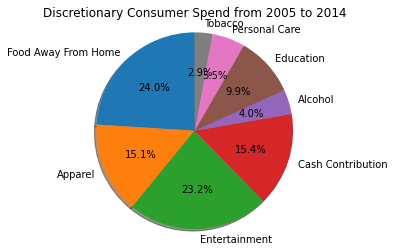

In [24]:
labels = 'Food Away From Home', 'Apparel', 'Entertainment', "Cash Contribution", 'Alcohol', "Education", "Personal Care", "Tobacco"
sizes = [total_foodaway, total_apparel, total_ent, total_cashc, total_alc, total_edu, total_perscare, total_tob]
explode = (0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Discretionary Consumer Spend from 2005 to 2014')
#plt.xlabel('Year')
#plt.ylabel('Amount')
plt.show()

In [21]:
#DISPOSABLE SORT 

#Food at Home
total_fat = df.groupby('seriesID')['value'].sum()["CXUFOODHOMELB1101M"]
total_fat = int(total_fat)
print("Total Food @ Home: " + str(total_fat))

#Health
total_health = df.groupby('seriesID')['value'].sum()["CXUHEALTHLB1101M"]
total_health = int(total_health)
print("Total Health: " + str(total_health))

#Housing
total_housing = df.groupby('seriesID')['value'].sum()["CXUHOUSINGLB1101M"]
total_housing = int(total_housing)
print("Total Housing: " + str(total_housing))

#Transportation
total_trans = df.groupby('seriesID')['value'].sum()["CXUTRANSLB1101M"]
total_trans = int(total_trans)
print("Total Transportation: " + str(total_trans))


Total Food @ Home: 50601
Total Health: 48518
Total Housing: 229753
Total Transportation: 114462


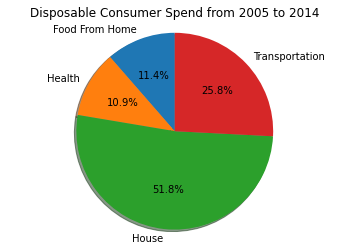

In [25]:
labels = 'Food From Home', 'Health', 'House', "Transportation"
sizes = [total_fat,total_health,total_housing,total_trans ]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Disposable Consumer Spend from 2005 to 2014')
#plt.xlabel('Year')
#plt.ylabel('Amount')
plt.show()

In [ ]:
df = df.sort_values(['seriesID','year'], ascending = True).reset_index(drop=True)
df

In [ ]:
df["value"].pct_change()

In [ ]:
apparel = bls.get_series('CXUAPPARELLB1101M', 2005, 2014)
entertainment = bls.get_series('CXUENTRTAINLB1101M', 2005, 2014)
food_away = bls.get_series('CXUFOODAWAYLB1101M', 2005, 2014)


apparel.plot(kind='line', x='date',y='value', color='red')
entertainment.plot(kind='line', x='date',y='value', color='orange')
food_away.plot(kind='line', x='date',y='value', color='green')

plt.title('Consumer Spend from 2005 to 2014')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()